In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading packages
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#removing unnamed column
df = df.iloc[:,1:]
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [5]:
df['International Reputation'].fillna(0, inplace=True)
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
for ncols in numerical_cols:
    df[ncols] = df[ncols].fillna(df[ncols].mean())
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
for ocols in object_cols:
    df[ocols] = df[ocols].fillna(df[ocols].mode()[0])   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      18207 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18207 non-null  object 
 14  Intern

In [7]:
#columns of dataframe
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [8]:
#shape of dataframe
df.shape

(18207, 88)

In [9]:
#display missing value count
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

m_v = df.isnull().sum()
print_full(m_v)

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF        

In [10]:
#converting to numerical values
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)
df['Value'] = df['Value'].apply(lambda x: extract_value_from(x))
df['Wage'] = df['Wage'].apply(lambda x: extract_value_from(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: extract_value_from(x))

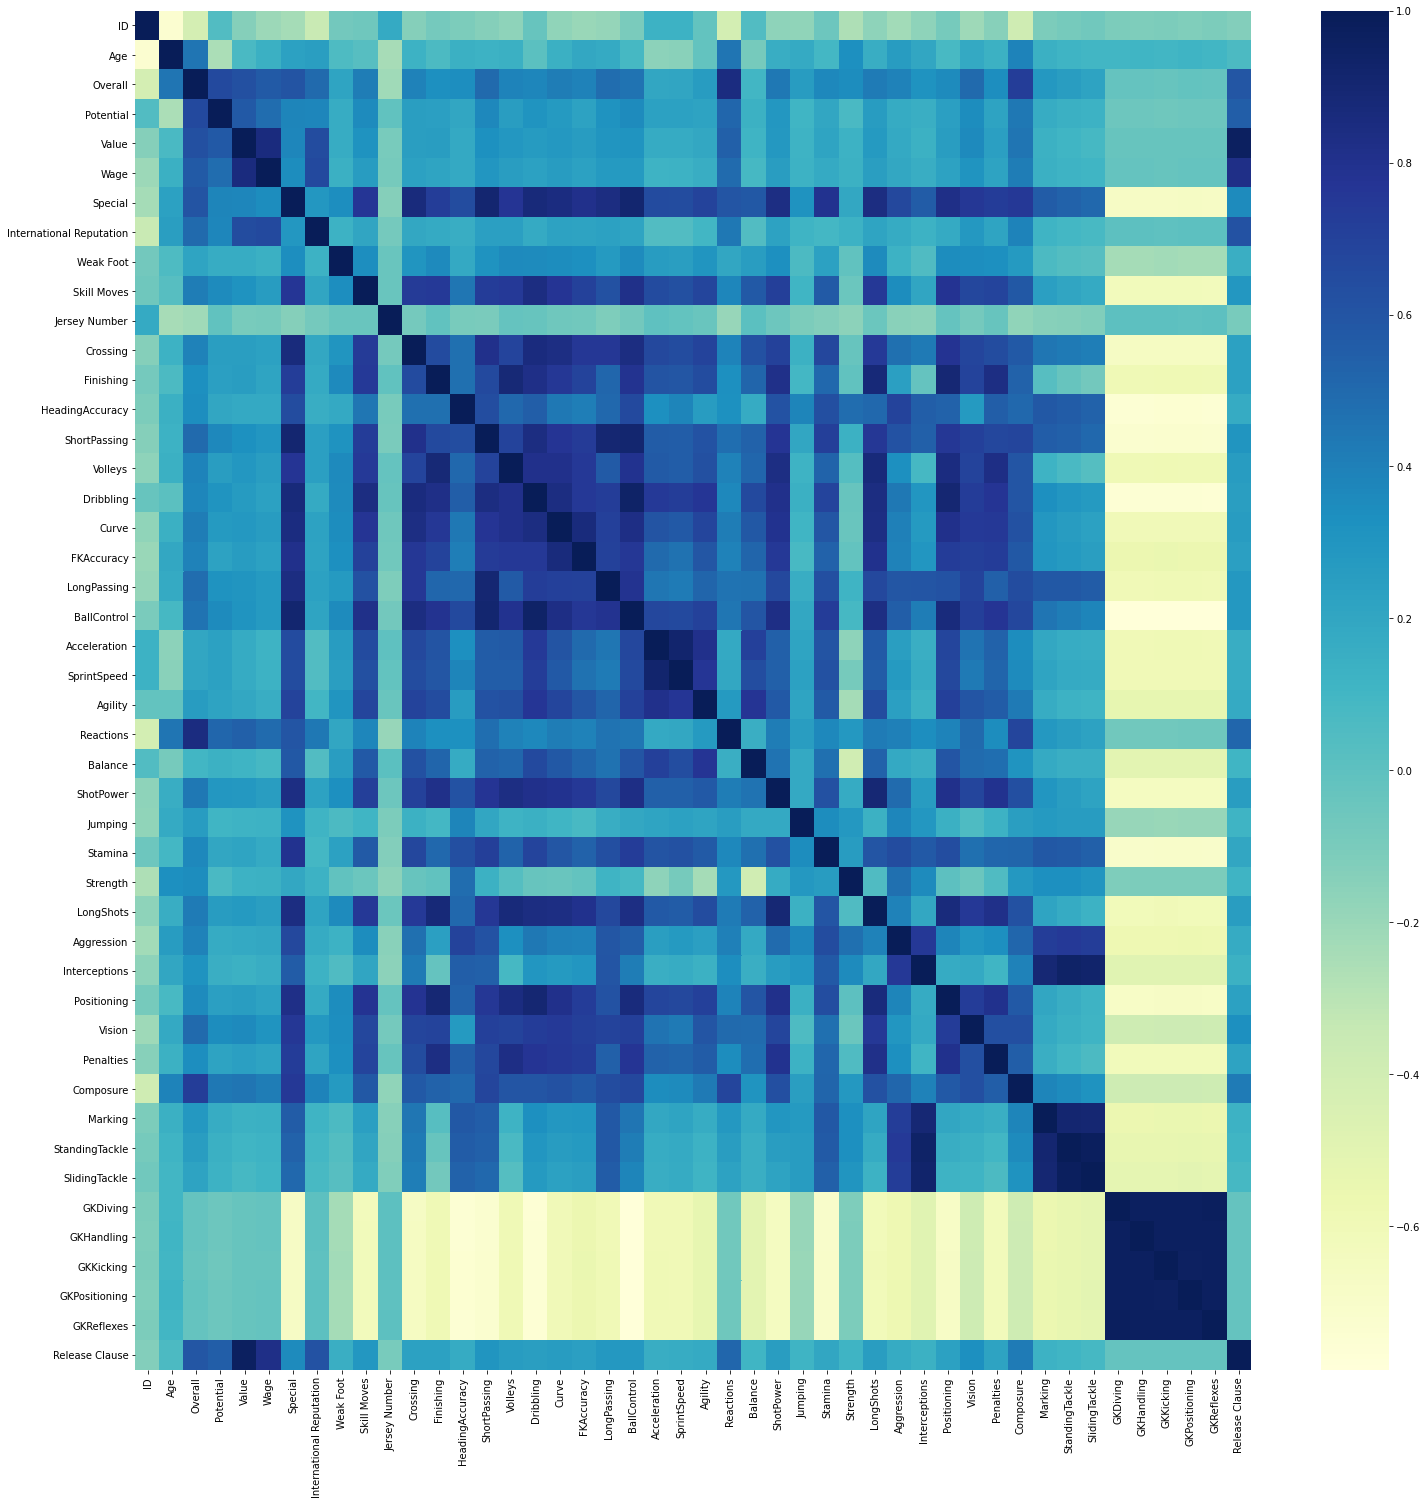

In [11]:
#heat plot
cor = df.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(cor, annot = False, cmap="YlGnBu" , fmt = '.1f', ax=ax)
plt.show()

In [12]:
#required columns
req_cols = cor[cor.loc['International Reputation']>0.3].T.columns
req_cols

Index(['Overall', 'Potential', 'Value', 'Wage', 'International Reputation',
       'Reactions', 'Composure', 'Release Clause'],
      dtype='object')

In [13]:
# impute missing values
df['Club'].fillna('No Club', inplace=True)
df['Position'].fillna('ST', inplace=True)

In [14]:
df.columns[df.isnull().any()]

Index([], dtype='object')

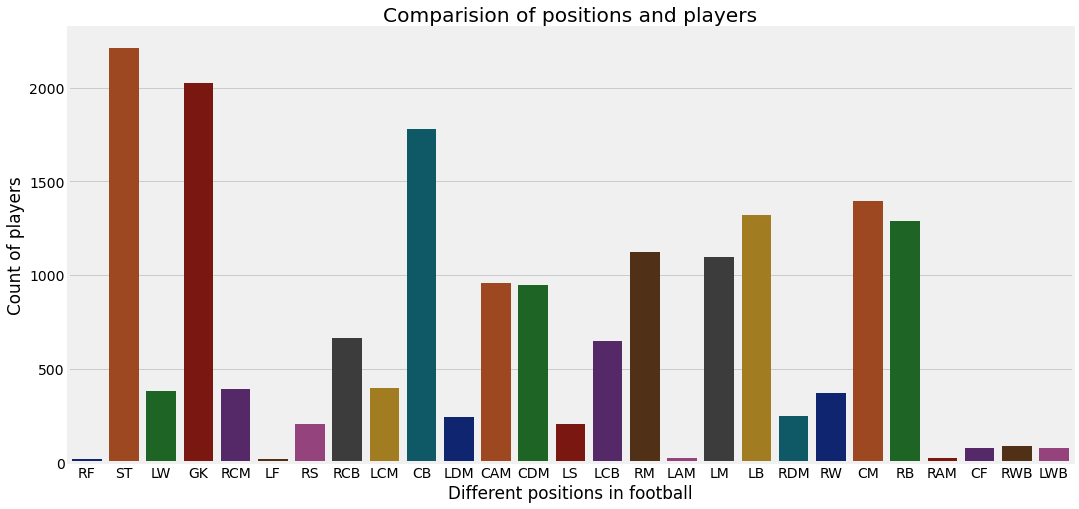

In [15]:
#plot on Different position taken be players

plt.figure(figsize=(18,8))
plt.style.use("fivethirtyeight")
ax = sns.countplot('Position', data=df, palette='dark')
ax.set_xlabel("Different positions in football")
ax.set_ylabel("Count of players")
ax.set_title("Comparision of positions and players")
plt.show()

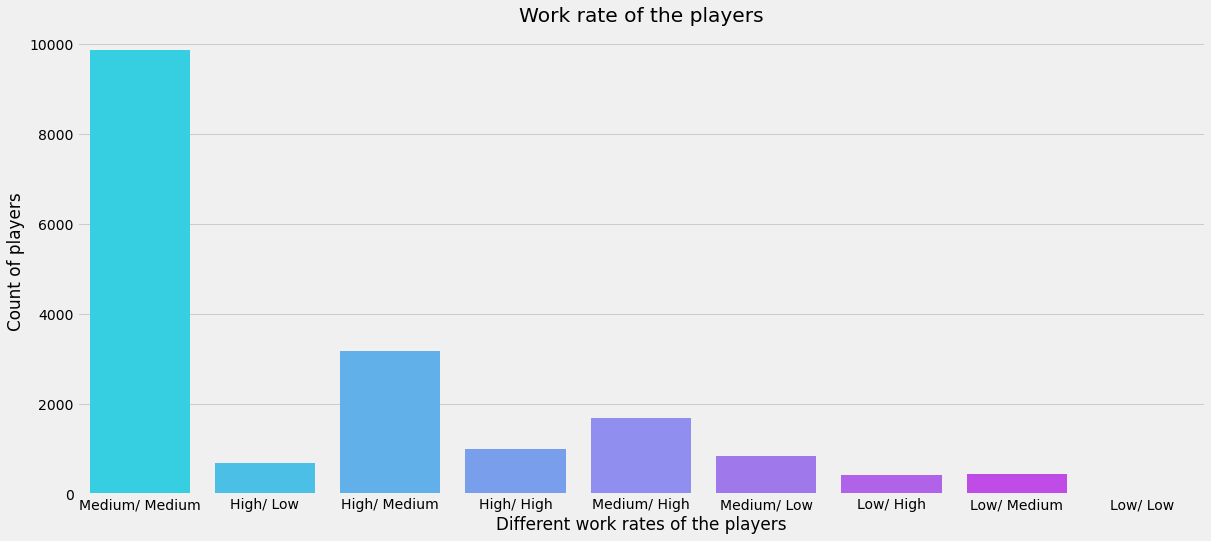

In [16]:
# Plot count of players based on their work rates

plt.figure(figsize=(18,8))
ax = sns.countplot('Work Rate', data=df, palette='cool')
ax.set_xlabel("Different work rates of the players")
ax.set_ylabel("Count of players")
ax.set_title("Work rate of the players")
plt.show()

In [17]:
Total_players = df.groupby("Nationality")["ID"].count().sort_values(ascending=False).head()
Total_players = pd.DataFrame(Total_players)
Total_players.rename(columns = {"ID":"Number"}, inplace=True)
Total_players

,Number
Nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914


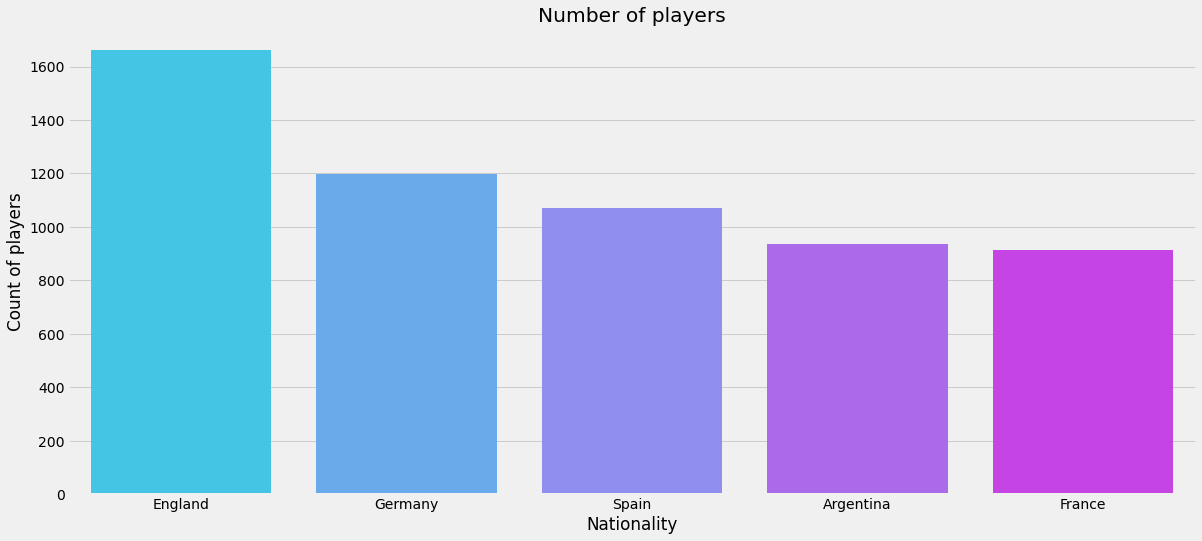

In [18]:
# Plot count of players based on nationality

plt.figure(figsize=(18,8))
ax = sns.barplot(x = Total_players.index, y="Number", data=Total_players, palette='cool')
ax.set_xlabel("Nationality")
ax.set_ylabel("Count of players")
ax.set_title("Number of players")
plt.show()

In [19]:
#selecting required columns
df1 = df[req_cols]
df1.head()

,Overall,Potential,Value,Wage,International Reputation,Reactions,Composure,Release Clause
0,94,94,110500000.0,565000.0,5.0,95.0,96.0,226500000.0
1,94,94,77000000.0,405000.0,5.0,96.0,95.0,127100000.0
2,92,93,118500000.0,290000.0,5.0,94.0,94.0,228100000.0
3,91,93,72000000.0,260000.0,4.0,90.0,68.0,138600000.0
4,91,92,102000000.0,355000.0,4.0,91.0,88.0,196400000.0


In [20]:
#splitting data
X_Train = df1.drop('International Reputation',axis=1)
Y_Train = df1['International Reputation']
Y_Train = Y_Train.apply(int)

In [21]:
X_Train.head()

,Overall,Potential,Value,Wage,Reactions,Composure,Release Clause
0,94,94,110500000.0,565000.0,95.0,96.0,226500000.0
1,94,94,77000000.0,405000.0,96.0,95.0,127100000.0
2,92,93,118500000.0,290000.0,94.0,94.0,228100000.0
3,91,93,72000000.0,260000.0,90.0,68.0,138600000.0
4,91,92,102000000.0,355000.0,91.0,88.0,196400000.0


In [22]:
Y_Train.head()

0    5
1    5
2    5
3    4
4    4
Name: International Reputation, dtype: int64

In [23]:
#new data information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Overall                   18207 non-null  int64  
 1   Potential                 18207 non-null  int64  
 2   Value                     18207 non-null  float64
 3   Wage                      18207 non-null  float64
 4   International Reputation  18207 non-null  float64
 5   Reactions                 18207 non-null  float64
 6   Composure                 18207 non-null  float64
 7   Release Clause            18207 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.1 MB


In [24]:
s = (X_Train.dtypes == 'object')
object_cols = list(s[s].index)

In [25]:
#encoding using lable encoder
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_Train.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_Train[col])

In [26]:
label_X_train.head()

,Overall,Potential,Value,Wage,Reactions,Composure,Release Clause
0,94,94,110500000.0,565000.0,95.0,96.0,226500000.0
1,94,94,77000000.0,405000.0,96.0,95.0,127100000.0
2,92,93,118500000.0,290000.0,94.0,94.0,228100000.0
3,91,93,72000000.0,260000.0,90.0,68.0,138600000.0
4,91,92,102000000.0,355000.0,91.0,88.0,196400000.0


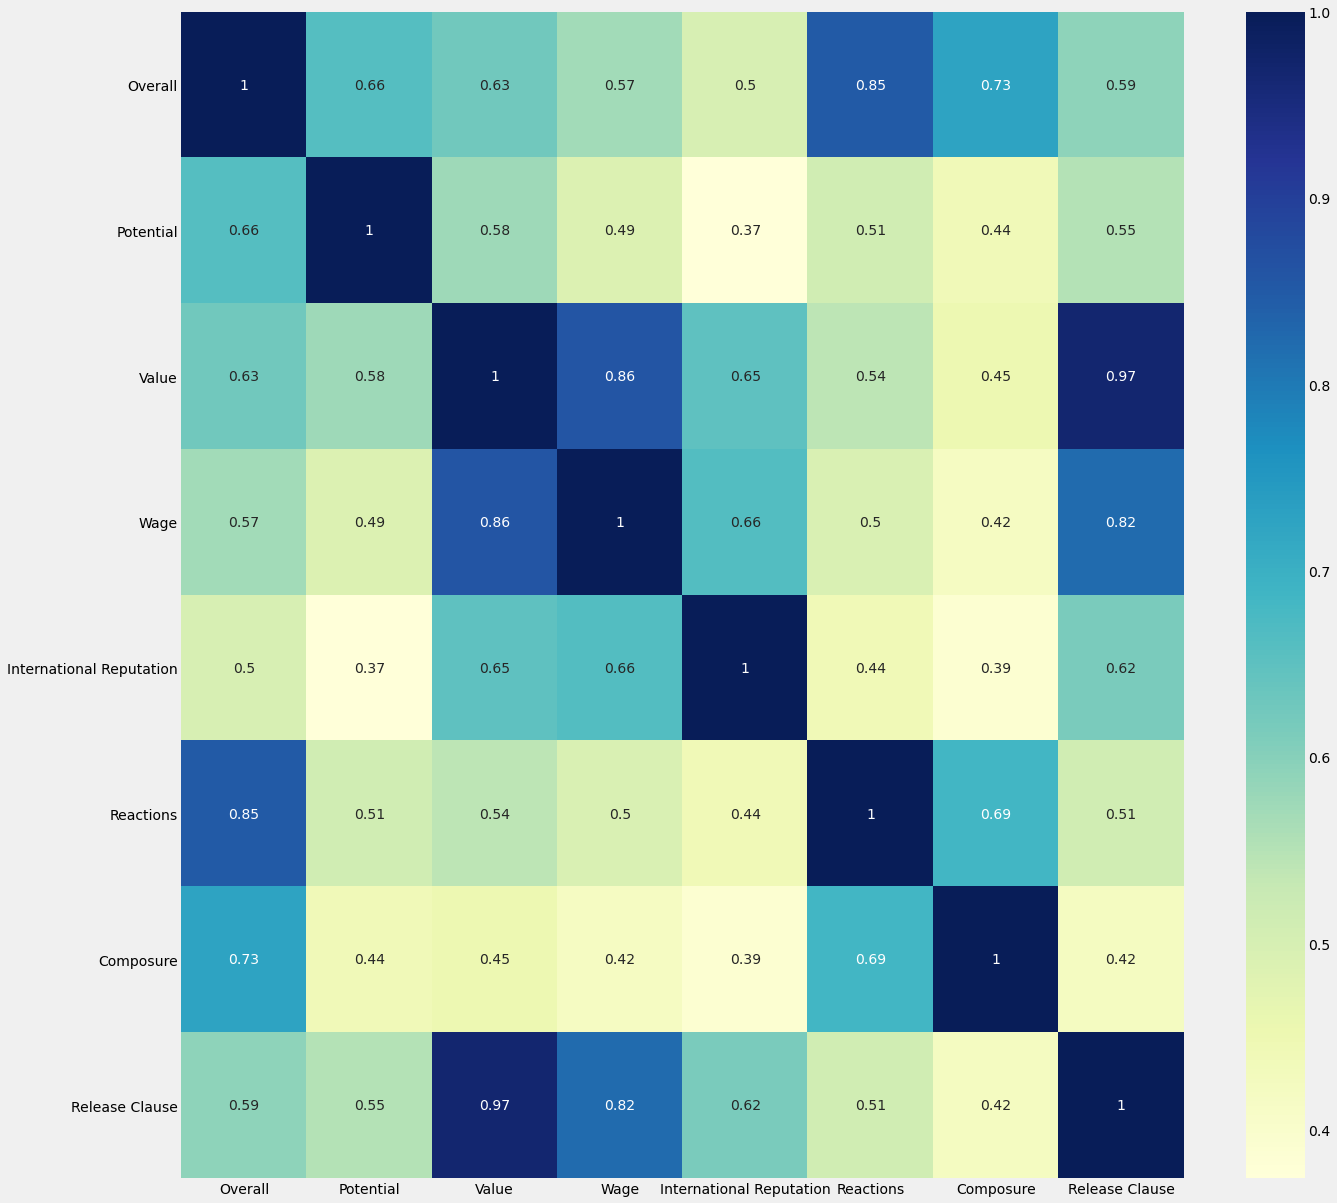

In [27]:
#heatmap for new data
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df1.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[corrmat.index].corr(),annot=True,cmap="YlGnBu")

In [28]:
#random forest classifier with RFCEV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
model_1 = RFECV(RandomForestClassifier(),scoring = 'accuracy')
model_1.fit(label_X_train,Y_Train)
print("\nRandomForestClassifier model Accuracy(in %):",model_1.score(label_X_train,Y_Train))


RandomForestClassifier model Accuracy(in %): 0.9999450760696436


In [29]:
#main features for random forest
features1 = []
for i in range(0,len(model_1.support_)):
    if model_1.support_[i] == True:
        features1.append(label_X_train.columns[i])
print(features1)

['Overall', 'Potential', 'Value', 'Wage', 'Reactions', 'Composure', 'Release Clause']


In [30]:
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model_2 = RFECV(AdaBoostClassifier(),scoring = 'accuracy')
model_2.fit(label_X_train,Y_Train)
print("\nAdaBoostClassifier model Accuracy(in %):",model_2.score(label_X_train,Y_Train))


AdaBoostClassifier model Accuracy(in %): 0.9177239523260284


In [31]:
#main features for adaboost
features2 = []
for i in range(0,len(model_2.support_)):
    if model_2.support_[i] == True:
        features2.append(label_X_train.columns[i])
print(features2)

['Overall', 'Composure']


In [32]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model_3 = RFECV(LogisticRegression(),scoring = 'accuracy')
model_3.fit(label_X_train,Y_Train)
print("\nLogisticRegression model Accuracy(in %):",model_3.score(label_X_train,Y_Train))

C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


LogisticRegression model Accuracy(in %): 0.9143735925742846


In [33]:
#main feature of logistic regression
features3 = []
for i in range(0,len(model_3.support_)):
    if model_3.support_[i] == True:
        features3.append(label_X_train.columns[i])
print(features3)

['Wage']


In [34]:
#Naive bayes classifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(label_X_train, Y_Train, test_size=0.4, random_state=1)
from sklearn.naive_bayes import GaussianNB 
model_4 = GaussianNB() 
model_4.fit(X_train,y_train) 
  
# making predictions on the testing set 
y_pred = model_4.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("\nGaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 85.04737058904298


In [35]:
#model optimisation using gridsearch
from sklearn.model_selection import GridSearchCV

X_train = label_X_train[features1]
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_Train, test_size=0.3, random_state=42)

In [36]:
#hyper parameter tuning for random forest
rfc = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [37]:
#best parameters
print("Tuned RandomForestClassifier Parameters: : ",CV_rfc.best_params_)
print("Best score : ",CV_rfc.best_score_)

Tuned RandomForestClassifier Parameters: :  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best score :  0.9291432968757409


In [38]:
#applying the best parameters
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 50,max_depth=7, criterion='entropy')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9379461834157057


In [39]:
#adaboost classifier tuning
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100,200,300],
                'learning_rate' : [0.001,0.01,0.1,0.2,0.5],
              }
X_train = label_X_train[features2]
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_Train, test_size=0.3, random_state=42)
#Building a 3 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#Fitting the grid to the training data
grid_object.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [40]:
#best parameters
print("Tuned AdaBoostClassifier Parameters: ",grid_object.best_params_)
print("Best score : ",grid_object.best_score_)

Tuned AdaBoostClassifier Parameters:  {'learning_rate': 0.01, 'n_estimators': 200}
Best score :  0.9198053986189579


In [41]:
ada1=AdaBoostClassifier(learning_rate = 0.01, n_estimators= 100)
ada1.fit(x_train, y_train)
pred=ada1.predict(x_test)
print("Accuracy for AdaboostClassifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for AdaboostClassifier on CV data:  0.9262310086033315


In [42]:
#logistic regression tuning
logreg = LogisticRegression() 
X_train = label_X_train[features3]
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_Train, test_size=0.3, random_state=42)
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5) 
logreg_cv.fit(x_train, y_train) 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_))

C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\balav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.9118802399192468


In [43]:
#applying best parameters
lr1=LogisticRegression(C= 1e-05)
lr1.fit(x_train, y_train)
pred=lr1.predict(x_test)
print("Accuracy for LogisticRegression on CV data: ",accuracy_score(y_test,pred))

Accuracy for LogisticRegression on CV data:  0.920190371590701


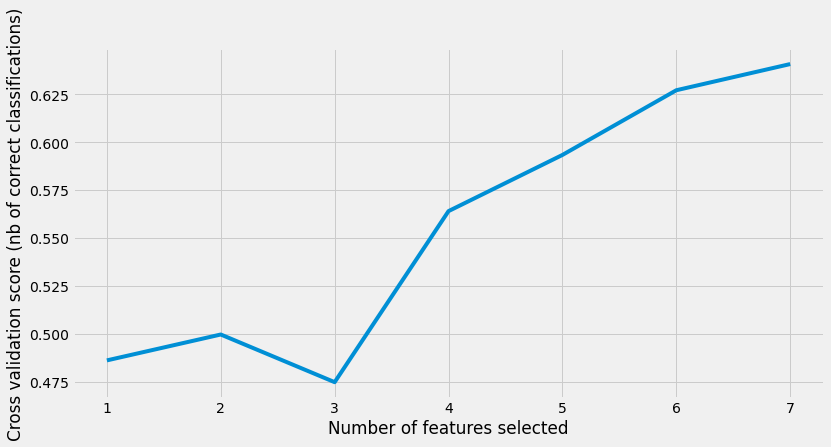

In [44]:
#data visualisation
import matplotlib.pyplot as plt
#Random forest
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(model_1.grid_scores_) + 1), model_1.grid_scores_)
plt.show()

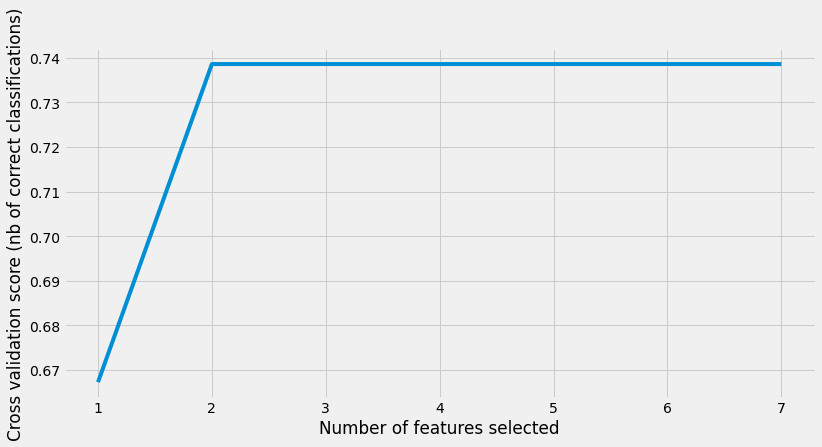

In [45]:
#AdaBoost classifier
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(model_2.grid_scores_) + 1), model_2.grid_scores_)
plt.show()

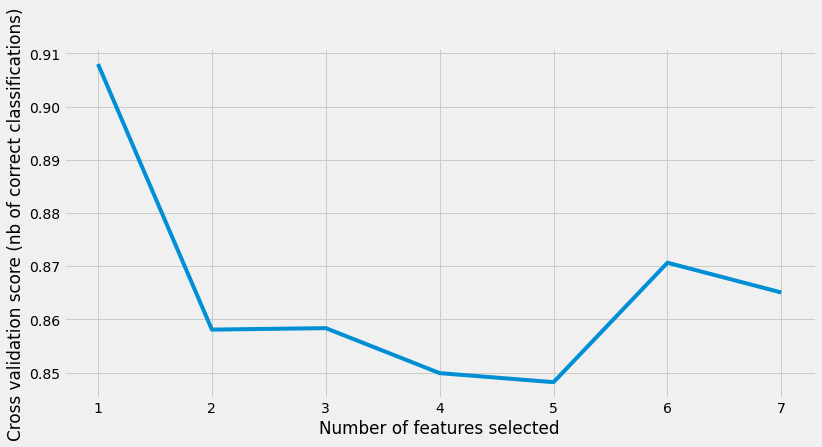

In [46]:
#LogisticRegression
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(model_3.grid_scores_) + 1), model_3.grid_scores_)
plt.show()

C:\Users\balav\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\balav\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\balav\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\balav\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


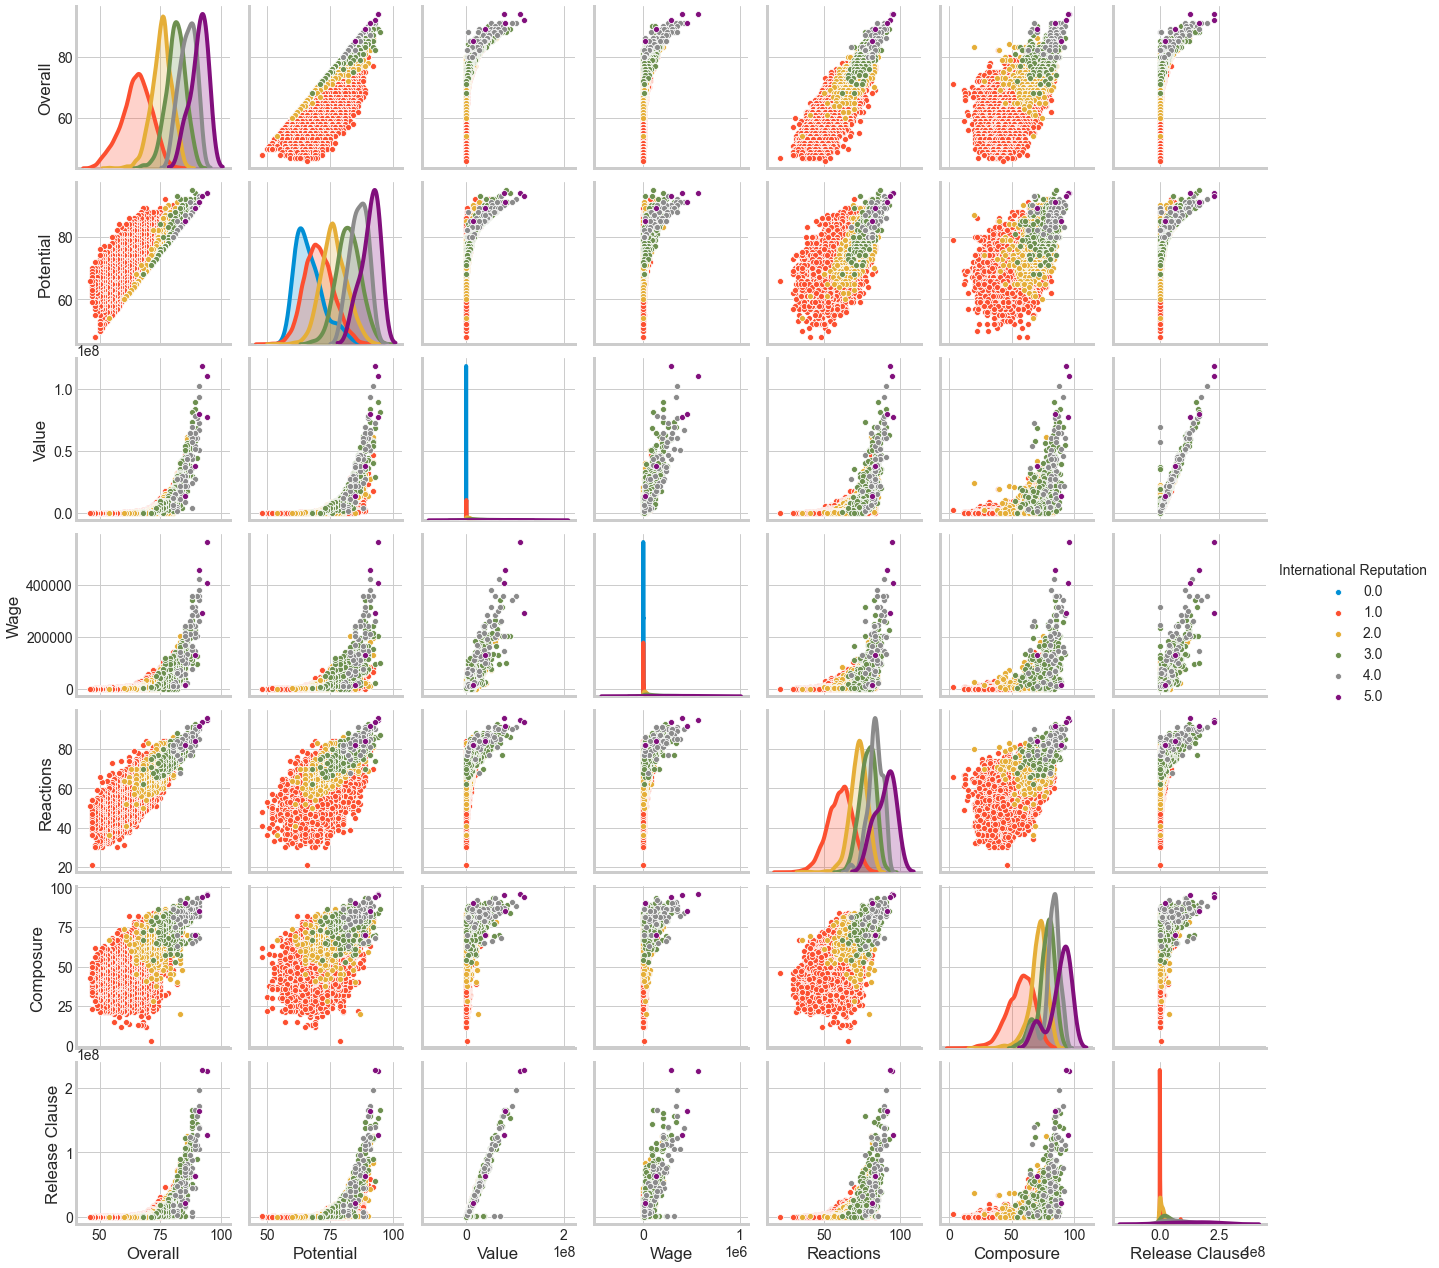

In [47]:
import seaborn as sns
sns.set_style("whitegrid");
sns.pairplot(df1, hue="International Reputation");
plt.show()

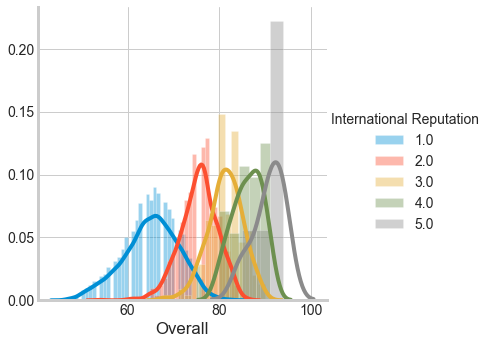

In [50]:
sns.FacetGrid(df1[df['International Reputation']!=0.0],hue='International Reputation',height=5).map(sns.distplot,'Overall').add_legend()